Let us look at the data from Kaggle Tabular Playground Series - January. First, we load the data.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/train.csv",index_col=0)
df.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
id,,,,,,,,,,,,,,,
1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046


In [74]:
test = pd.read_csv("data/test.csv",index_col=0)
test.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
id,,,,,,,,,,,,,,
0,0.353600,0.738780,0.600939,0.293377,0.285691,0.458006,0.620704,0.422249,0.369203,0.435727,0.550540,0.699134,0.286864,0.364515
2,0.907222,0.189756,0.215531,0.869915,0.301333,0.528958,0.390351,0.521112,0.794779,0.798580,0.446475,0.449037,0.916964,0.513002
6,0.179287,0.355353,0.623972,0.437812,0.282476,0.320826,0.386789,0.776422,0.222268,0.229102,0.211913,0.222651,0.327164,0.827941
7,0.359385,0.181049,0.551368,0.206386,0.280763,0.482076,0.506677,0.362793,0.379737,0.345686,0.445276,0.518485,0.299028,0.598166
10,0.335791,0.682607,0.676481,0.219465,0.282861,0.581721,0.748639,0.350158,0.448915,0.506878,0.817721,0.805895,0.790591,0.249275


### Visualization
Since there are only 14 feature columns and a target column, let us take a look at all of their distribution plots, as well as their boxplots.

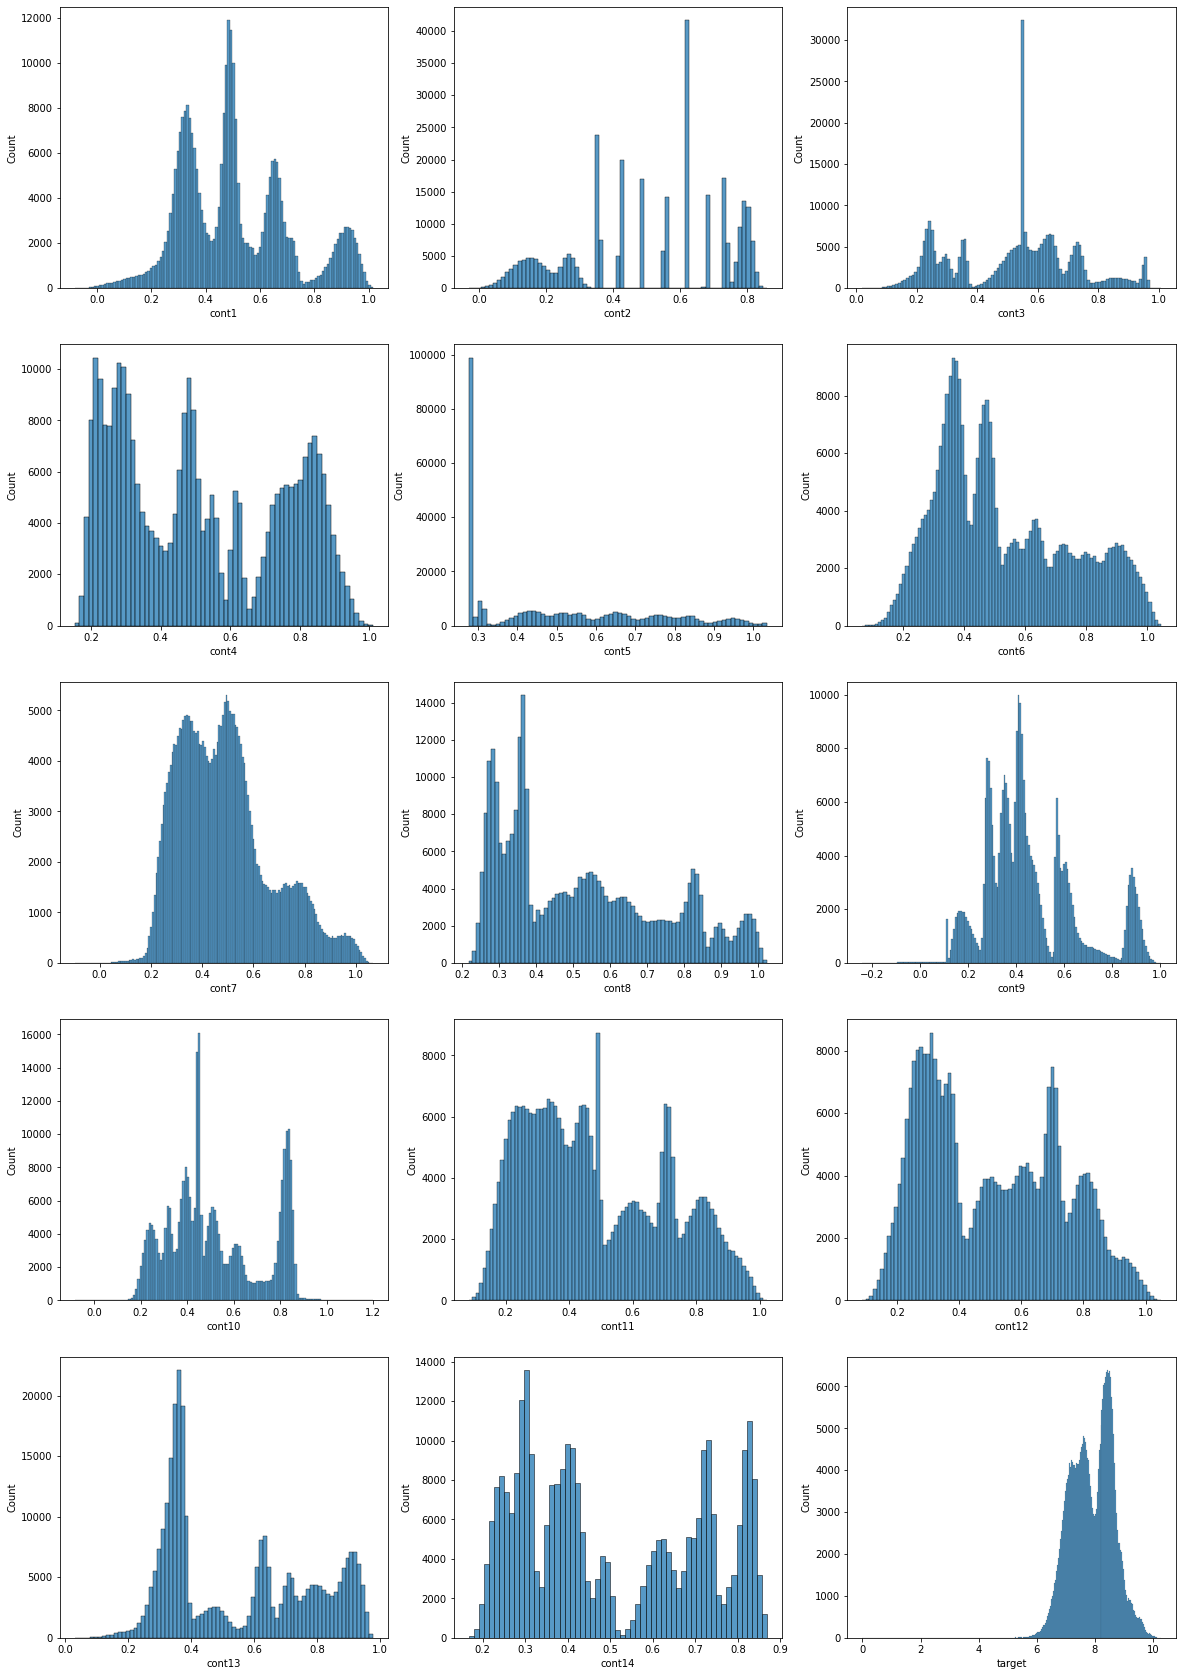

In [27]:
fig, ax = plt.subplots(5,3,figsize=(20,30))
for i in range(len(df.columns)):
    sns.histplot(df[df.columns[i]],ax=ax[i//3,i%3])
plt.show()

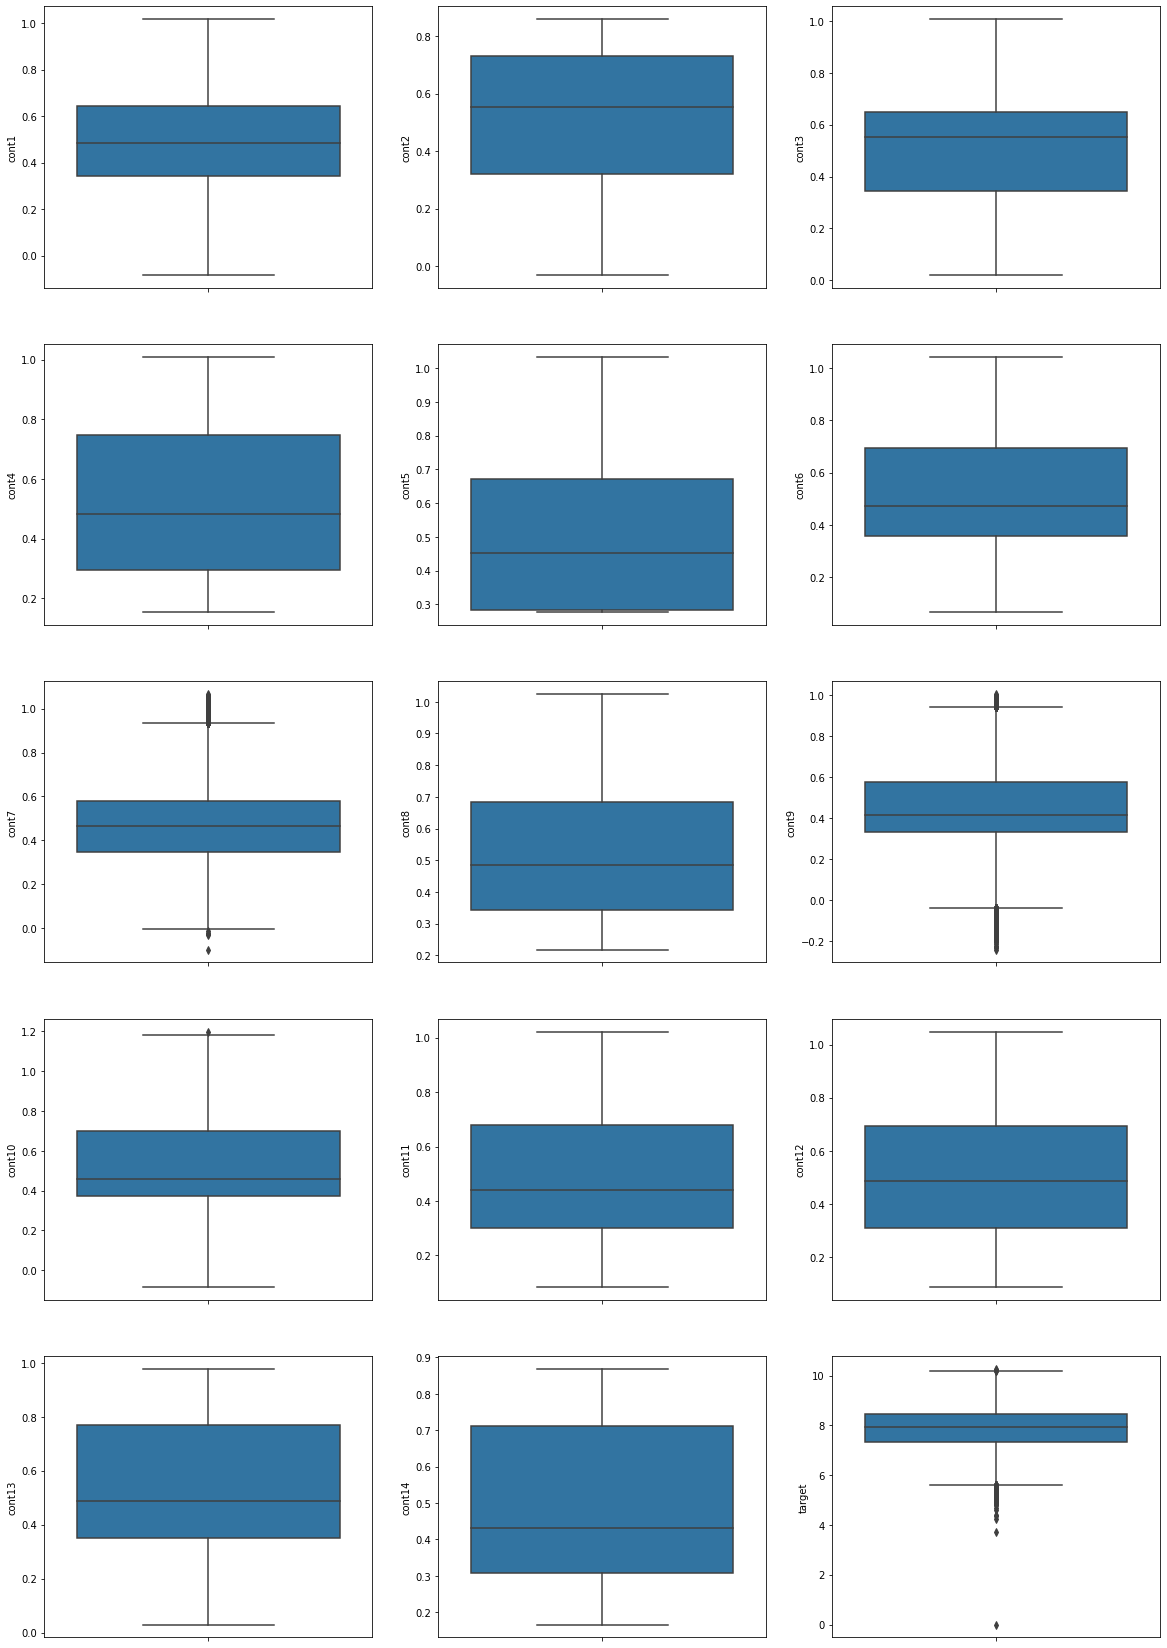

In [28]:
fig, ax = plt.subplots(5,3,figsize=(20,30))
for i in range(len(df.columns)):
    sns.boxplot(y=df[df.columns[i]],ax=ax[i//3,i%3])
plt.show()

To investigate dependencies between the columns, let us also look at the correlation matrix.

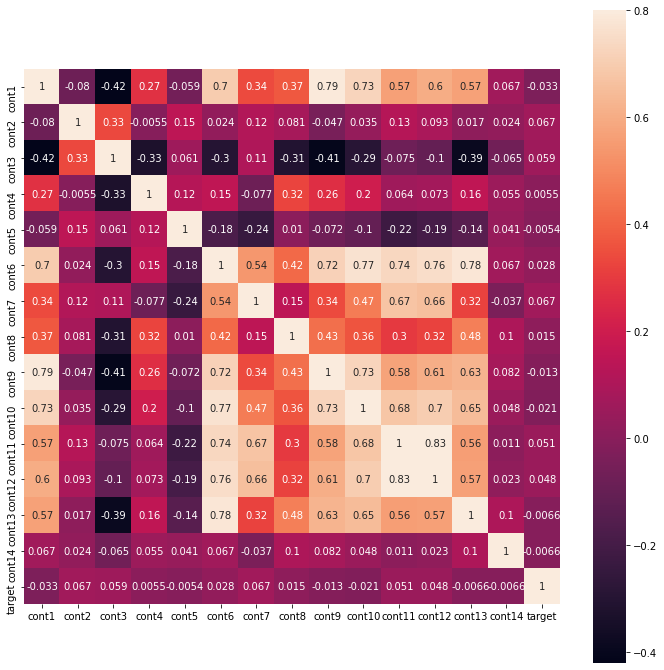

In [29]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),vmax=.8,square=True,annot=True)
plt.show()

There are a few dependencies between the features. For example, the positive correlations of `cont6` to `cont13` are quite noticeable. Interestingly, `target` is not really dependent on any single column. 

### Bench mark: linear regression

In [118]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, \
                                    Lasso, LassoCV, ElasticNet
from sklearn.model_selection import cross_val_score, learning_curve, \
                                    validation_curve
from sklearn.utils import shuffle

Let us also include a simplified implementation of the [plot learning curve](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py) function. 

In [98]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    if axes is None:
        axes = plt.axes()

    plt.title(title)
    
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Error")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                        scoring = "neg_root_mean_squared_error",
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = -np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = -np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")

    return plt

In [78]:
# separating features and target
y = pd.DataFrame(df.target)
train = df.drop(['target'],axis=1)

In [89]:
# Cross-validation scores for linear regression
-cross_val_score(LinearRegression(),train,y,cv=10,
                 scoring='neg_root_mean_squared_error')

array([0.72959369, 0.72894404, 0.72910387, 0.72512859, 0.72370349,
       0.72916593, 0.72179602, 0.72650582, 0.72281263, 0.72558807])

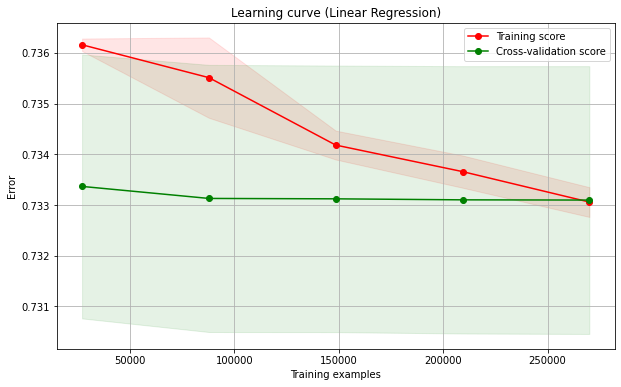

In [102]:
# Learning curve for linear regression
title = "Learning curve (Linear Regression)"
plot_learning_curve(LinearRegression(),title,shuffle(train,random_state=10),
                    y,cv=10)
plt.show()

Now this is a little strange, as our training error is worse than the validation error. Of course, this is possible, but I'm not sure why this is the case here. 

In [86]:
linreg_preds = LinearRegression().fit(train,y).predict(test)
linreg_preds = pd.DataFrame(linreg_preds,index=test.index)
linreg_preds.columns = ['target']
linreg_preds.to_csv('predictions/linreg.csv')

Submitting this gives a score of 0.7278, which we shall remember as our benchmark. 

### Adding some spice with regularization

In [117]:
# Ridge
alphas = [0.001, 0.003,0.005,0.01, 0.03, 0.05, 
          0.1, 0.3, 0.5, 1, 3, 5, 10, 30, 50, 100]
ridge = RidgeCV(alphas=alphas,scoring="neg_root_mean_squared_error",cv=10)
ridge.fit(train,y)
ridge.alpha_,ridge.best_score_

(10.0, -0.7262341595492992)

In [120]:
# ridge prediction
ridge_preds = Ridge(alpha=10).fit(train,y).predict(test)
ridge_preds = pd.DataFrame(ridge_preds,index=test.index)
ridge_preds.columns = ['target']
ridge_preds.to_csv('predictions/ridge.csv')

In [121]:
ridge_preds

,target
id,
0,8.053523
2,7.597975
6,7.950714
7,7.941894
10,8.060783
...,...
499984,7.939215
499985,7.975067
499987,7.856080


In [123]:
# Lasso
alphas = [0.001, 0.003,0.005,0.01, 0.03, 0.05, 
          0.1, 0.3, 0.5, 1, 3, 5, 10, 30, 50, 100]
lasso = LassoCV(alphas=alphas,cv=10)
lasso.fit(train,y)
lasso.alpha_,ridge.best_score_

d:\projects\funwithkaggle\venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


(0.001, -0.7262341595492992)

In [124]:
# lasso prediction
lasso_preds = Lasso(alpha=0.001).fit(train,y).predict(test)
lasso_preds = pd.DataFrame(lasso_preds,index=test.index)
lasso_preds.columns = ['target']
lasso_preds.to_csv('predictions/lasso.csv')

In [125]:
lasso_preds

,target
id,
0,8.026996
2,7.674180
6,7.931432
7,7.920829
10,8.056073
...,...
499984,7.922326
499985,7.930921
499987,7.882189


In [128]:
# combined ridge lasso
ridgelasso = 0.7*ridge_preds + 0.3*lasso_preds
ridgelasso.to_csv('predictions/ridgelasso.csv')

In [129]:
ridgelasso

,target
id,
0,8.045565
2,7.620836
6,7.944929
7,7.935575
10,8.059370
...,...
499984,7.934148
499985,7.961823
499987,7.863913


From what we have seen, adding regularization doesn't seem to work quite well. This is somewhat evident from the learning curve of linear regression, as we don't really have an overfitting problem on the training set. 